In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [36]:
# Loading expousre images into a list
img_fn = ['samples/sample-00.png', 'samples/sample-01.png', 'samples/sample-02.png', 'samples/sample-03.png', 'samples/sample-04.png', 'samples/sample-05.png']
img_list = [cv2.imread(fn) for fn in img_fn]

exposure_times = np.float64([1/160.0, 1/125.0, 1/80.0, 1/60.0, 1/40.0, 1/15.0])

In [37]:
# Merge exposures to HDR image
merge_debvec = cv2.createMergeDebevec()
hdr_debvec = merge_debvec.process(img_list, times=exposure_times.copy())
merge_robertson = cv2.createMergeRobertson()
hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy())

In [38]:
# Tonemap HDR image
tonemap1 = cv2.createTonemapDurand(gamma=2.2)
res_debvec = tonemap1.process(hdr_debvec.copy())
tonemap2 = cv2.createTonemapDurand(gamma=1.3)
res_robertson = tonemap2.process(hdr_robertson.copy())

In [39]:
# Exposure fusion using Mertens
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)

In [42]:
 # Convert datatype to 8-bit and save
res_debvec_8bit = np.clip(res_debvec*255, 0, 255).astype('uint8')
res_robertson_8bit = np.clip(res_robertson*255, 0, 255).astype('uint8')
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
 
cv2.imwrite("ldr_debvec.jpg", res_debvec_8bit)
cv2.imwrite("ldr_robertson.jpg", res_robertson_8bit)
cv2.imwrite("fusion_mertens.jpg", res_mertens_8bit)

True

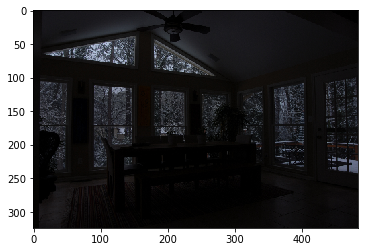

In [44]:
img1 = cv2.imread('samples/sample-00.png')
img2 = cv2.imread('samples/sample-01.png')
img3 = cv2.imread('samples/sample-02.png')
img4 = cv2.imread('samples/sample-03.png')
img5 = cv2.imread('samples/sample-04.png')
img6 = cv2.imread('samples/sample-05.png')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

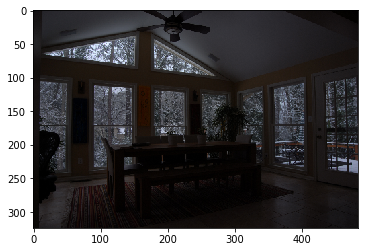

In [45]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

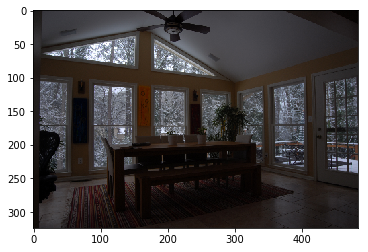

In [46]:
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

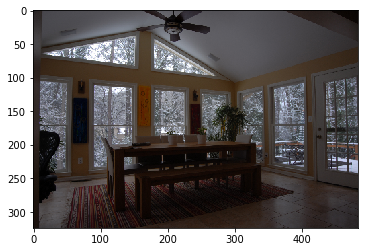

In [47]:
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))

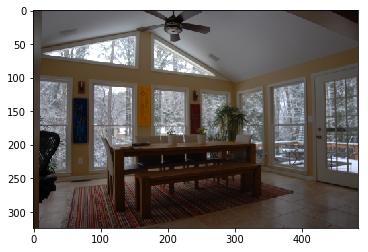

In [48]:
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))

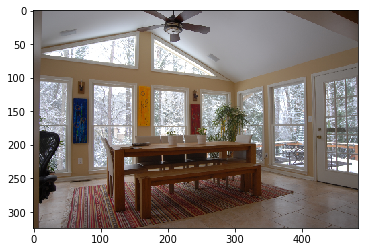

In [49]:
plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))